**"Portuguese Bank Marketing Prediction "**

**Problem Statement**
This project uses data from a Portuguese bank's telemarketing campaigns (2008–2010), aimed at promoting term deposits.

Objectives:

Analyze customer and campaign data.

Build a model to predict if a client will subscribe to a term deposit.

Suggest ways to improve campaign success.

**1.  Import Required Libraries**


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier


**2. Load the Dataset**

In [2]:
from google.colab import files
uploaded = files.upload()  # Upload bank-full.csv

df = pd.read_csv("bank-full.csv", sep=";")
df.head()


Saving bank-full.csv to bank-full (2).csv


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


**3. Data Preprocessing**

In [3]:
# Check for null values
df.isnull().sum()

# Encode categorical variables using LabelEncoder
label_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col])

df.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


**4. Exploratory Data Analysis (EDA)**

In [4]:
df.info()
df.describe()
df['y'].value_counts(normalize=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   age        45211 non-null  int64
 1   job        45211 non-null  int64
 2   marital    45211 non-null  int64
 3   education  45211 non-null  int64
 4   default    45211 non-null  int64
 5   balance    45211 non-null  int64
 6   housing    45211 non-null  int64
 7   loan       45211 non-null  int64
 8   contact    45211 non-null  int64
 9   day        45211 non-null  int64
 10  month      45211 non-null  int64
 11  duration   45211 non-null  int64
 12  campaign   45211 non-null  int64
 13  pdays      45211 non-null  int64
 14  previous   45211 non-null  int64
 15  poutcome   45211 non-null  int64
 16  y          45211 non-null  int64
dtypes: int64(17)
memory usage: 5.9 MB


,proportion
y,
0,0.883015
1,0.116985


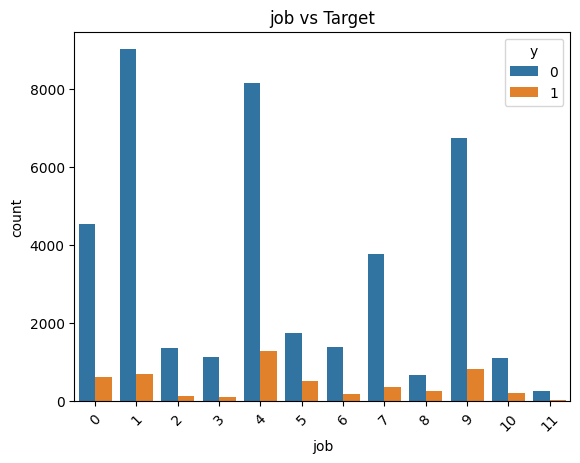

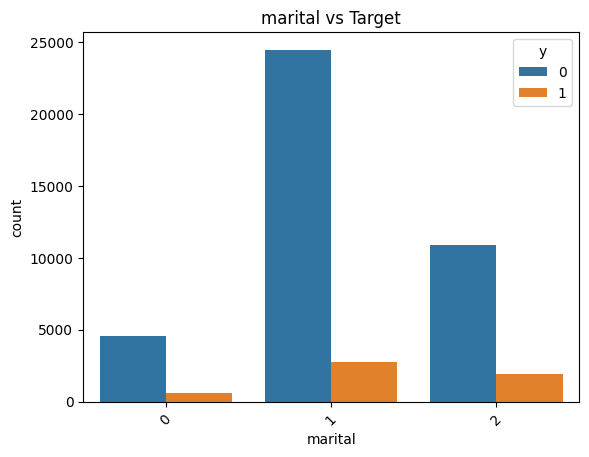

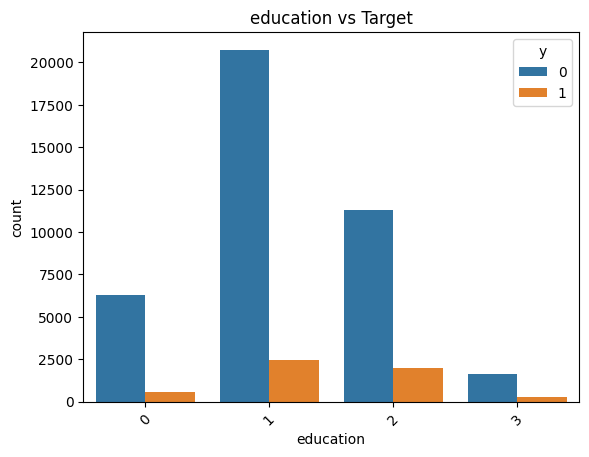

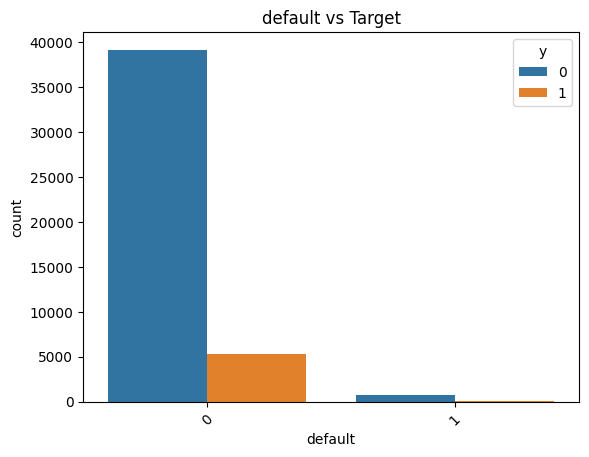

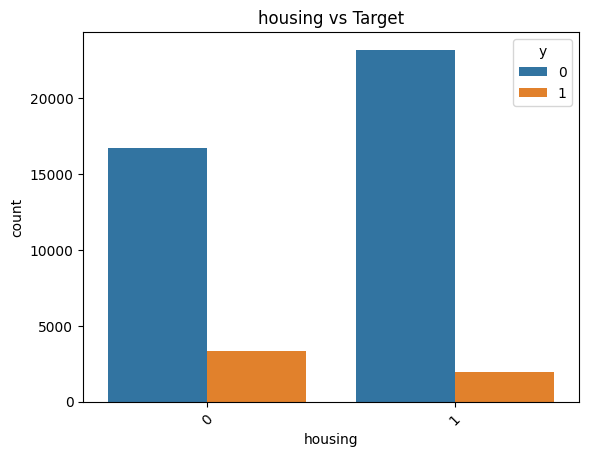

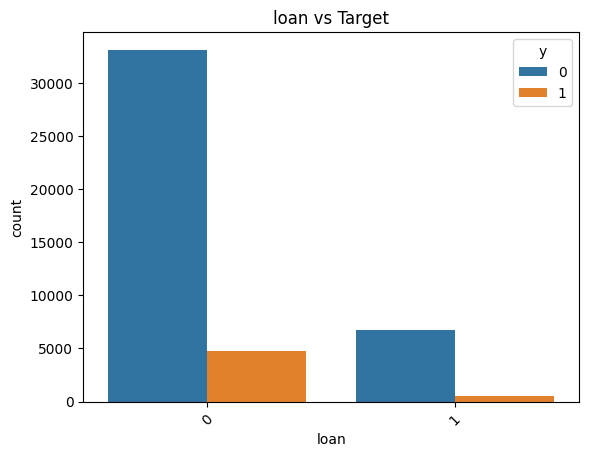

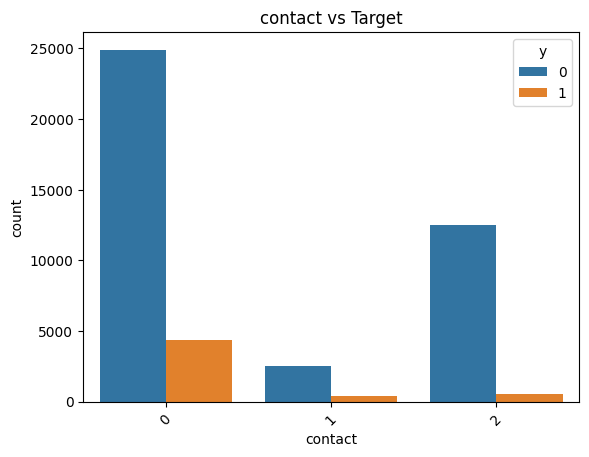

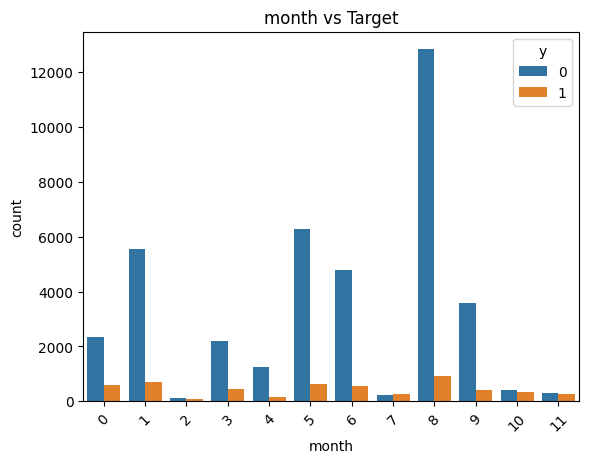

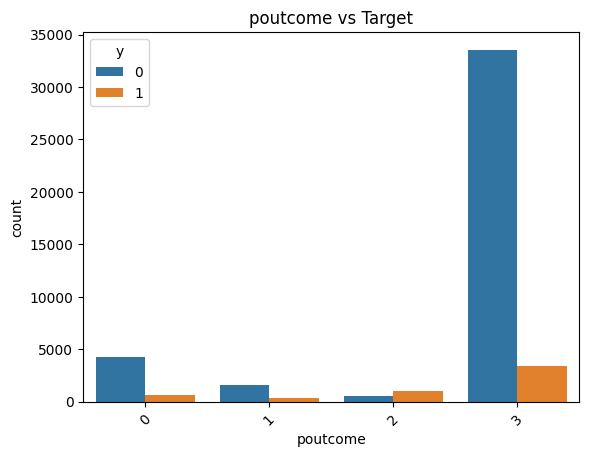

In [5]:
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome']
for col in categorical_cols:
    sns.countplot(data=df, x=col, hue='y')
    plt.title(f'{col} vs Target')
    plt.xticks(rotation=45)
    plt.show()


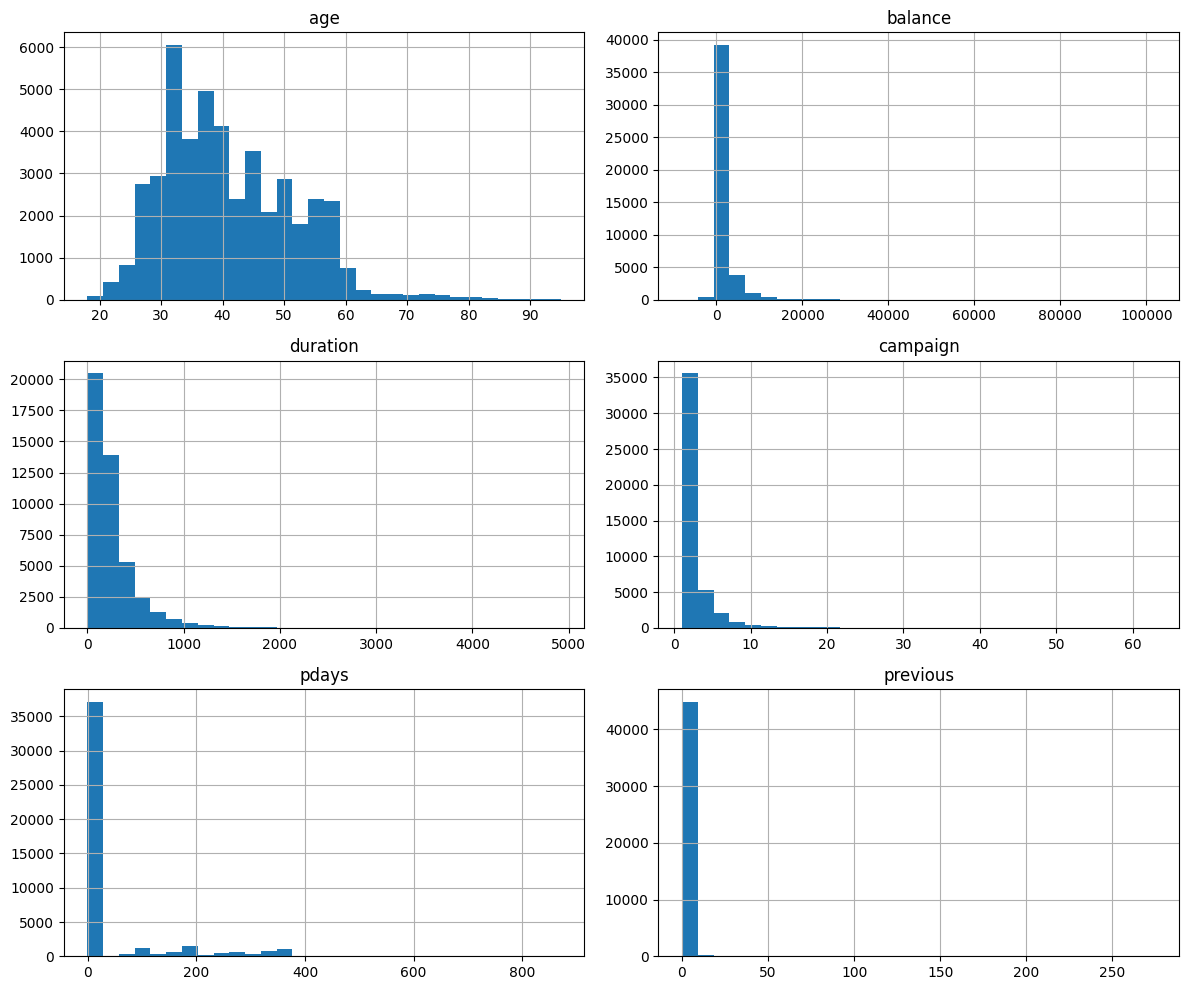

In [6]:
numeric_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[numeric_cols].hist(bins=30, figsize=(12, 10))
plt.tight_layout()
plt.show()


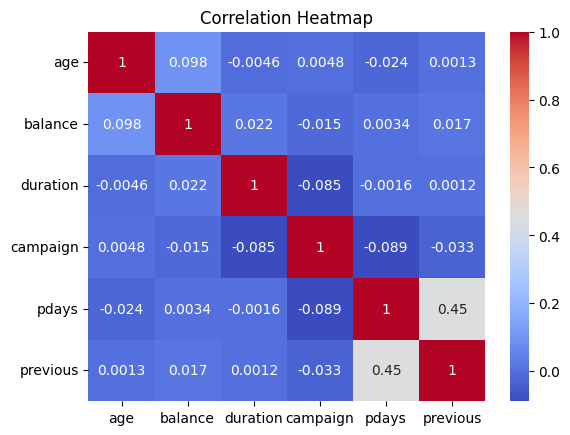

In [7]:
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


**5. Data Preprocessing**

In [8]:
# Feature-target split

X = df.drop("y", axis=1)  # Features
y = df["y"]               # Target


In [9]:
# train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
# Handling class imbalance (SMOTE / class_weight)

import warnings
from sklearn.exceptions import ConvergenceWarning

warnings.filterwarnings("ignore", category=ConvergenceWarning)

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)





**4. Creating and Training the Models**

(1) Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=5000, random_state=42, class_weight='balanced', C=0.5, solver='saga')
log_reg.fit(X_train_scaled, y_train)  # You can skip SMOTE if using class_weight


LogisticRegression(C=0.5, class_weight='balanced', max_iter=5000,
                   random_state=42, solver='saga')

(2) Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

(3) XGBoost

In [27]:
from xgboost import XGBClassifier

xgb = XGBClassifier(
    n_estimators=200,
    learning_rate=0.1,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    eval_metric='logloss'   # keep this
)

xgb.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, ...)

**5. Predictions**

In [28]:
y_pred_log = log_reg.predict(X_test_scaled)   # Logistic Regression (scaled)
y_pred_rf = rf.predict(X_test)                # Random Forest
y_pred_xgb = xgb.predict(X_test)             # XGBoost

**6. Models Evaluation**

In [29]:
from sklearn.metrics import accuracy_score, classification_report

# Logistic Regression Evaluation
print(" Logistic Regression")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("\nClassification Report:\n", classification_report(y_test, y_pred_log))
print("-"*60)

# Random Forest Evaluation
print(" Random Forest")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("-"*60)

# XGBoost Evaluation
print(" XGBoost")
print("Accuracy:", accuracy_score(y_test,y_pred_xgb))
print("\nClassification Report:\n", classification_report(y_test,y_pred_xgb))
print("-"*60)


 Logistic Regression
Accuracy: 0.8043790777396882

Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.80      0.88      7952
           1       0.36      0.81      0.50      1091

    accuracy                           0.80      9043
   macro avg       0.66      0.81      0.69      9043
weighted avg       0.89      0.80      0.83      9043

------------------------------------------------------------
 Random Forest
Accuracy: 0.9004755059161783

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.64      0.41      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043

------------------------------------------------------------
 XGBoost
Accuracy: 0.9072210549596373

Classification Report:
               pre

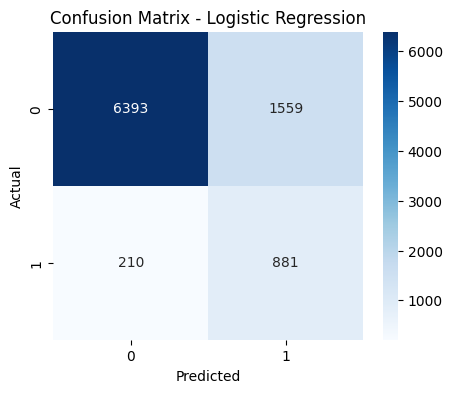

In [35]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Confusion Matrix - Logistic Regression
cm_log = confusion_matrix(y_test, y_pred_log)
plt.figure(figsize=(5,4))
sns.heatmap(cm_log, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()




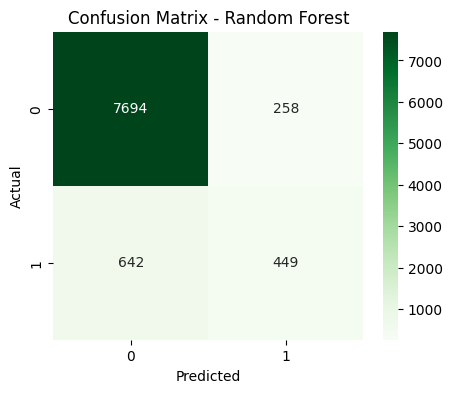

In [36]:
# Confusion Matrix - Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


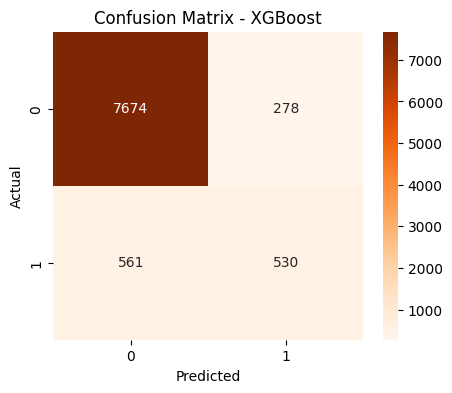

In [37]:

# Confusion Matrix - XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Oranges")
plt.title("Confusion Matrix - XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

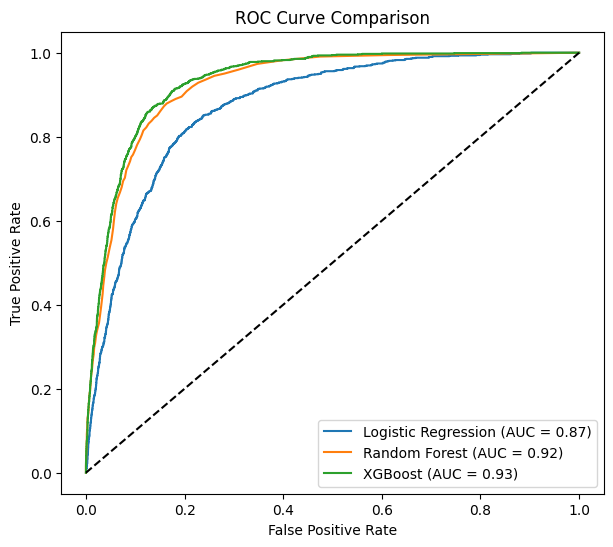

In [48]:
# AUC and ROC

from sklearn.metrics import roc_curve, auc

# Logistic Regression (scaled test set)
y_prob_log = log_reg.predict_proba(X_test_scaled)[:,1]
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
auc_log = auc(fpr_log, tpr_log)


# Random Forest (unscaled test set)
y_prob_rf = rf.predict_proba(X_test)[:,1]
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
auc_rf = auc(fpr_rf, tpr_rf)

# XGBoost (unscaled test set)
y_prob_xgb = xgb.predict_proba(X_test)[:,1]
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)
auc_xgb = auc(fpr_xgb, tpr_xgb)



# Plot ROC Curves
plt.figure(figsize=(7,6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {auc_rf:.2f})")
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost (AUC = {auc_xgb:.2f})")
plt.plot([0,1], [0,1], 'k--')  # baseline
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()

In [49]:
# Model Comparison Table

from sklearn.metrics import accuracy_score, f1_score

# Collect metrics
results = {
    "Model": ["Logistic Regression", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_log),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_log),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ]
}

results_df = pd.DataFrame(results)
print(results_df)


                 Model  Accuracy  F1 Score
0  Logistic Regression  0.804379  0.499009
1        Random Forest  0.900476  0.499444
2              XGBoost  0.907221  0.558189


## **Conclusion**

Among the three models tested:
- Logistic Regression achieved an AUC of 0.87  
- Random Forest achieved an AUC of 0.92  
- XGBoost achieved the best performance with an AUC of 0.93  

Therefore, **XGBoost is the recommended model** for predicting customer subscription in the Portuguese Bank Marketing dataset, due to its higher discriminative power and overall performance.
